# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# raw data from tidytuesday

jobs_df = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-05/jobs_gender.csv')
jobs_df |> head()

Rows: 2088 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): occupation, major_category, minor_category
dbl (9): year, total_workers, workers_male, workers_female, percent_female, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,occupation,major_category,minor_category,total_workers,workers_male,workers_female,percent_female,total_earnings,total_earnings_male,total_earnings_female,wage_percent_of_male
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,Chief executives,"Management, Business, and Financial",Management,1024259,782400,241859,23.6,120254,126142,95921,76.04208
2013,General and operations managers,"Management, Business, and Financial",Management,977284,681627,295657,30.3,73557,81041,60759,74.97316
2013,Legislators,"Management, Business, and Financial",Management,14815,8375,6440,43.5,67155,71530,65325,91.32532
2013,Advertising and promotions managers,"Management, Business, and Financial",Management,43015,17775,25240,58.7,61371,75190,55860,74.29179
2013,Marketing and sales managers,"Management, Business, and Financial",Management,754514,440078,314436,41.7,78455,91998,65040,70.69719
2013,Public relations and fundraising managers,"Management, Business, and Financial",Management,44198,16141,28057,63.5,74114,90071,66052,73.33326


Visualization #1: 

In [10]:
visual1 = jobs_df |>
    group_by(year, major_category) |>
    summarize(avg_earnings = mean(total_earnings), .groups='drop') |> #find average earnings for each industry in each year
    top_n(7, avg_earnings) #takes 7 industries with the top average earnings

visual1

year,major_category,avg_earnings
<dbl>,<chr>,<dbl>
2013,"Computer, Engineering, and Science",74339.86
2014,"Computer, Engineering, and Science",76092.90
2014,Healthcare Practitioners and Technical,73594.56
2015,"Computer, Engineering, and Science",77049.32
2015,Healthcare Practitioners and Technical,75699.25
2016,"Computer, Engineering, and Science",78765.44
2016,Healthcare Practitioners and Technical,77922.81


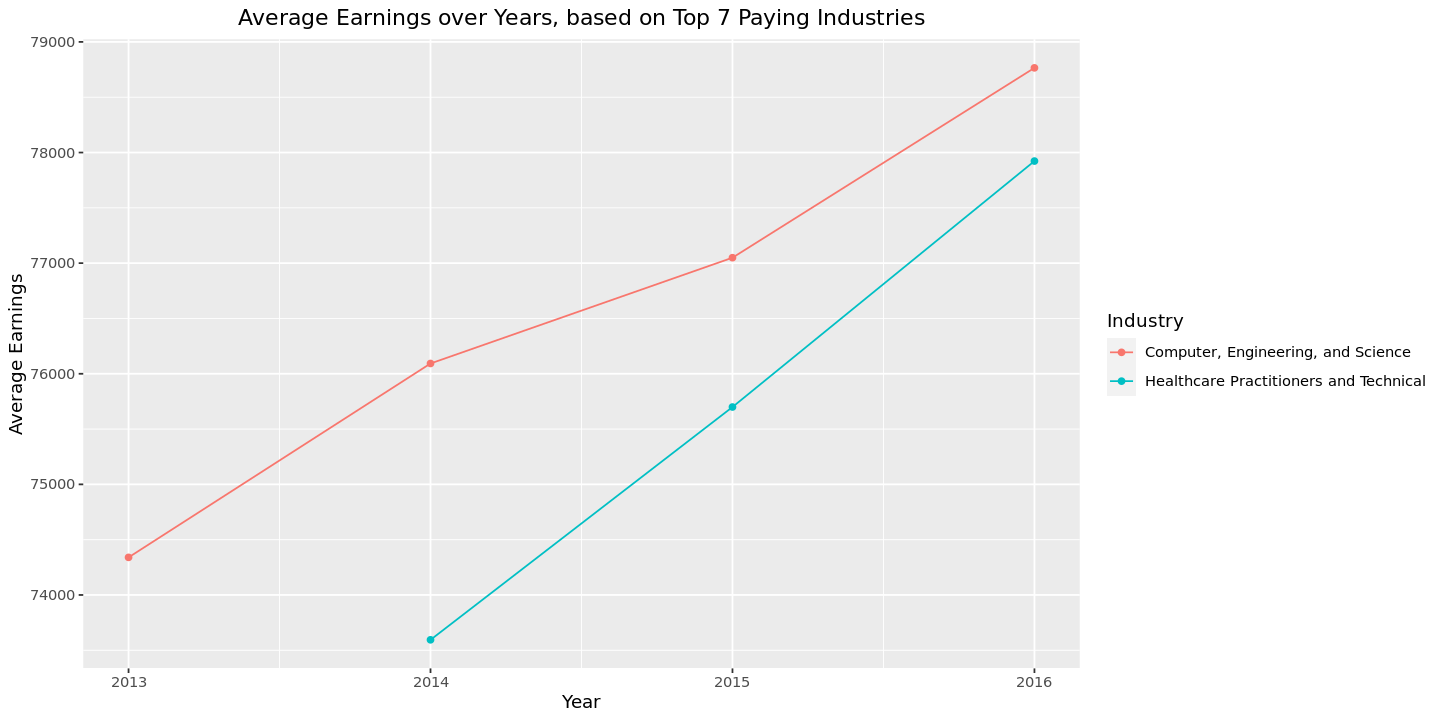

In [4]:
options(repr.plot.width=12, repr.plot.height=6)
p = ggplot(visual1, aes(x = year, y = avg_earnings, color=major_category)) +
    geom_line() +
    geom_point() +
    labs(x = "Year", 
         y = "Average Earnings", 
         title = "Average Earnings over Years, based on Top 7 Paying Industries",
         color="Industry") + #change legend title
    theme(plot.title = element_text(hjust = 0.5))

           
p

Analysis #1: 
This first visualization shows us the top 7 paying industries between 2013 and 2016. Each of these industries have a gradual increase in earnings as time progresses. The line graph shows that the computer, engineering, and science industry is the highest paying industry, with the healthcare practitioners and technical industry being a close second. 

Visualization #2:

In [5]:
visual2 = jobs_df |>
    filter(major_category=="Computer, Engineering, and Science",
           year=="2016",
           occupation != "Computer , all other",
           occupation != "Engineers, all other") |>
    top_n(5, total_workers)|>
    pivot_longer(cols = starts_with("workers_"),
    names_to = "gender",
    values_to = ("num_of_workers")) |>
    select(occupation, gender, num_of_workers) 

visual2
    

occupation,gender,num_of_workers
<chr>,<chr>,<dbl>
Computer systems analysts,workers_male,267043
Computer systems analysts,workers_female,181282
Computer programmers,workers_male,293334
Computer programmers,workers_female,77178
"Software developers, applications and systems software",workers_male,918865
"Software developers, applications and systems software",workers_female,205796
Computer support specialists,workers_male,418848
Computer support specialists,workers_female,134870
"Engineering technicians, except drafters",workers_male,262975


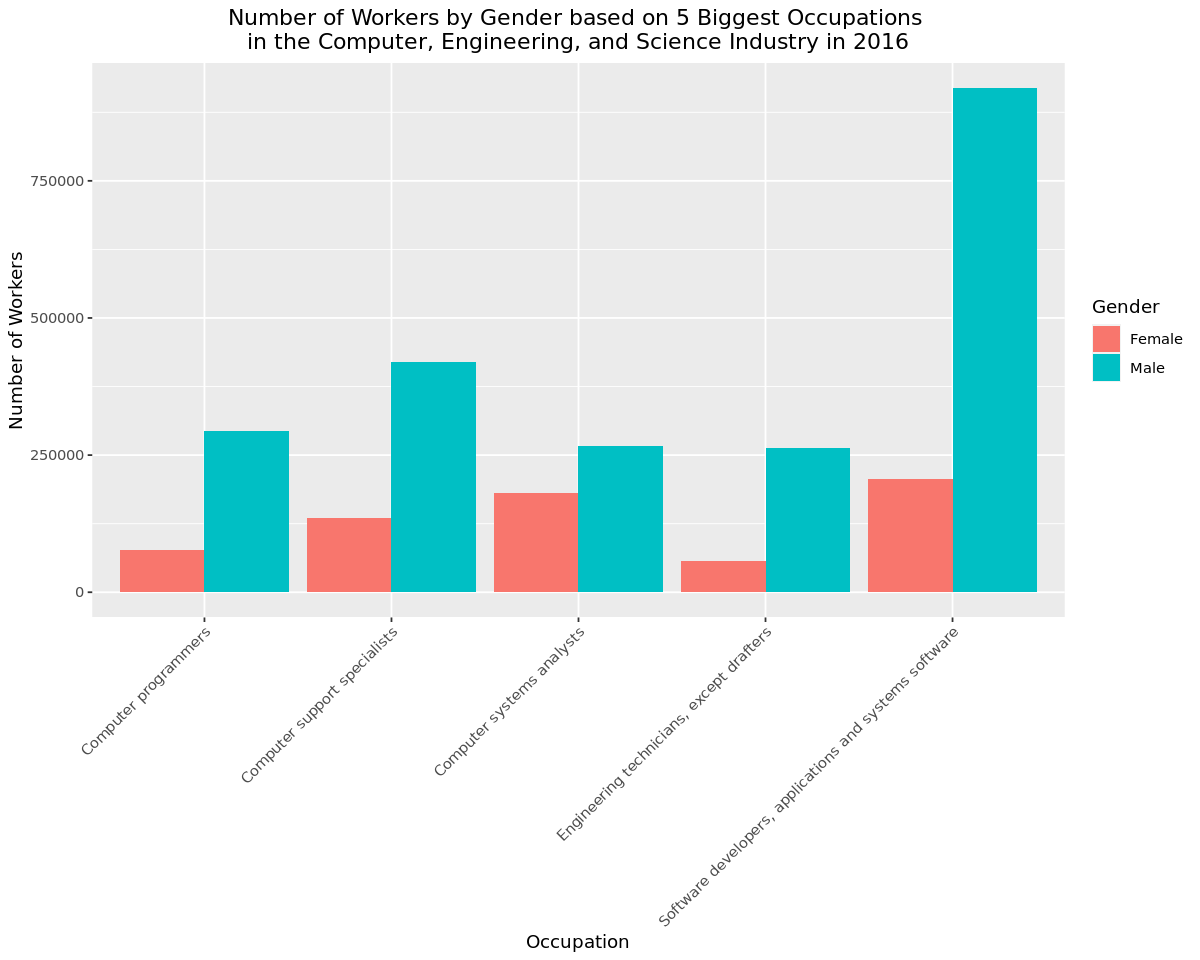

In [7]:
options(repr.plot.width=10, repr.plot.height=8)

p = ggplot(visual2, aes(x = occupation, y = num_of_workers, fill = gender)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Occupation",
         y = "Number of Workers",
         title = "Number of Workers by Gender based on 5 Biggest Occupations \nin the Computer, Engineering, and Science Industry in 2016",
         fill = "Gender") + #change legend title
    scale_fill_discrete(labels=c("Female", "Male")) + #changes legend labels
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

p

Analysis #2: From Visual #1, we saw that the computer, engineering, and science industry was the highest earning industry between 2013 and 2016. For Visual #2, I analyzed the number of workers in the industry, based on the 5 most popular occupations, broken down by gender. There is a drastic difference in how many females are employed in the computer, engineering, and science industry compared to males. The difference is very prominent in the software developers occupation.

Visualization #3:

In [8]:
visual3 = jobs_df |>
    filter(!is.na(wage_percent_of_male), year=="2016") |> #get rid of rows with NA values
    group_by(major_category) |>
    summarize(avg_wage_percent = mean(wage_percent_of_male, na.rm = TRUE), .groups='drop') |> #find the average wage percent in each industry
    mutate(avg_wage_percent = round(avg_wage_percent, 2), #round the value to two decimal points
           major_category = fct_reorder(major_category, avg_wage_percent, .desc = FALSE)) #put values in ascending order

visual3

major_category,avg_wage_percent
<fct>,<dbl>
"Computer, Engineering, and Science",86.97
"Education, Legal, Community Service, Arts, and Media",85.91
Healthcare Practitioners and Technical,85.82
"Management, Business, and Financial",81.96
"Natural Resources, Construction, and Maintenance",88.79
"Production, Transportation, and Material Moving",78.67
Sales and Office,83.49
Service,85.55


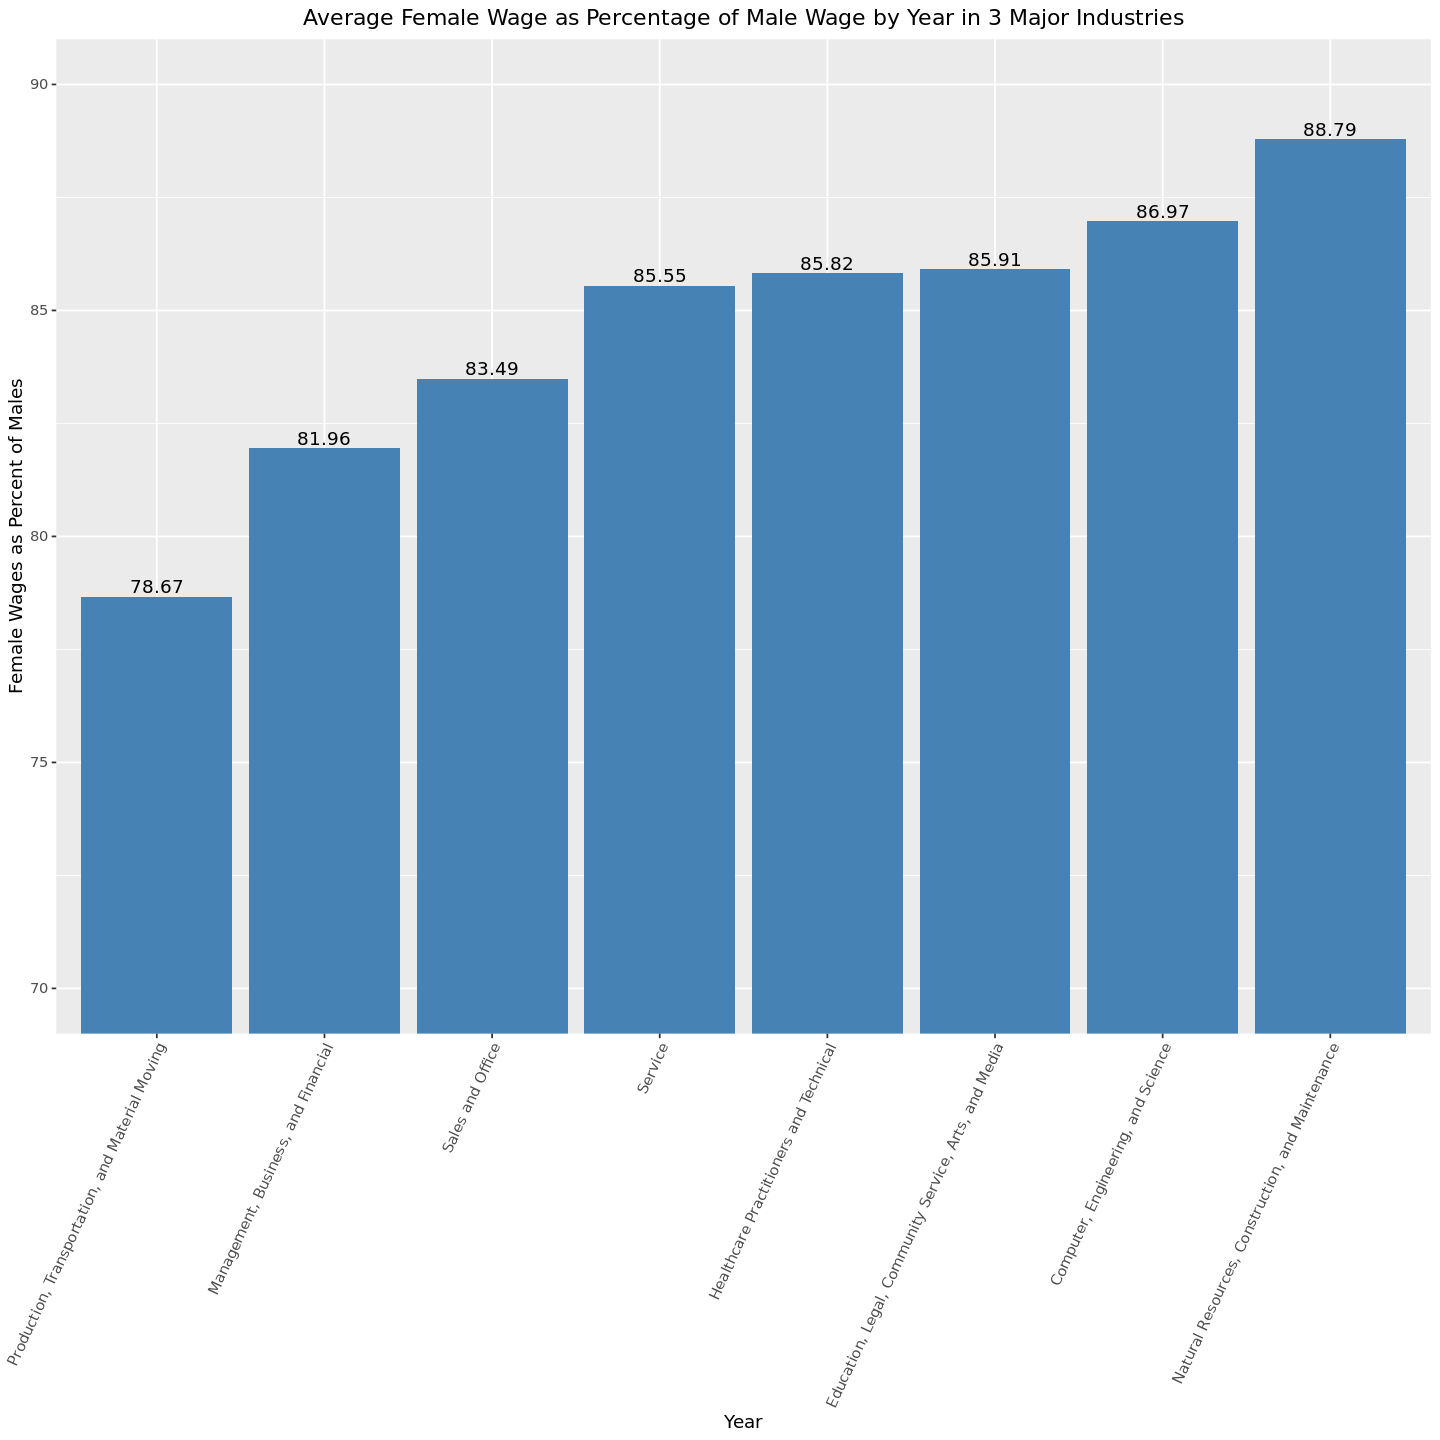

In [9]:
options(repr.plot.width=12, repr.plot.height=12)

p = ggplot(visual3, aes(x=major_category, y=avg_wage_percent)) +
    geom_bar(stat = "identity", position = "dodge", fill='steelblue')+
    labs(x = "Year",
         y = "Female Wages as Percent of Males",
         title = "Average Female Wage as Percentage of Male Wage by Year in 3 Major Industries") +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.text.x = element_text(angle = 65, hjust = 1)) +
    geom_text(aes(label=avg_wage_percent), position=position_dodge(width=0.9), vjust=-0.25) + #add numeric wage percent values on top of bars
    coord_cartesian(ylim = c(70, 90)) #i originally tried doing scale_y_continuous(limits=c(70,90)) but this would make my bars dissapear, so i found this line online
    
p

Analysis #3: For this last visualization, I analyzed the female wage, in different industries, as a percent of male wage. The bar graph shows that in the production, transportation, and material moving industry, females, on average, make the least wage in respect to the male wage in that industry. While the computer, engineering, and science industry had significant differences in male vs female workers, as shown in Visual #2, we see that the average female wage as a percent to male wage is the second highest in all the industries in the data set at 86.97%. 